In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_key = '<KEY>'

# 1. Create The Fred Object

In [3]:
fred = Fred(api_key=fred_key)

# 2. Search for economic data!

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-01-08,2024-01-08,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-01-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-08 08:55:06-06:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-01-08,2024-01-08,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-10-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-12-26 08:12:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-01-08,2024-01-08,S&P 500,2014-01-06,2024-01-05,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-01-05 19:10:58-06:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-01-08,2024-01-08,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-01-05,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-01-08 08:55:09-06:00,82,This data represents the effective yield of th...
MEHOINUSA672N,MEHOINUSA672N,2024-01-08,2024-01-08,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,82,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSHMCPCFA156NRUG,CSHMCPCFA156NRUG,2024-01-08,2024-01-08,Share of Merchandise Imports at Current Purcha...,1960-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:37:36-06:00,3,Source ID: csh_m When using these data in you...
CSHMCPNPA156NRUG,CSHMCPNPA156NRUG,2024-01-08,2024-01-08,Share of Merchandise Imports at Current Purcha...,1960-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:33:11-06:00,3,Source ID: csh_m When using these data in you...
CSHMCPROA156NRUG,CSHMCPROA156NRUG,2024-01-08,2024-01-08,Share of Merchandise Imports at Current Purcha...,1960-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:33:09-06:00,3,Source ID: csh_m When using these data in you...


# 3. Pull Raw Data & Plot

In [6]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

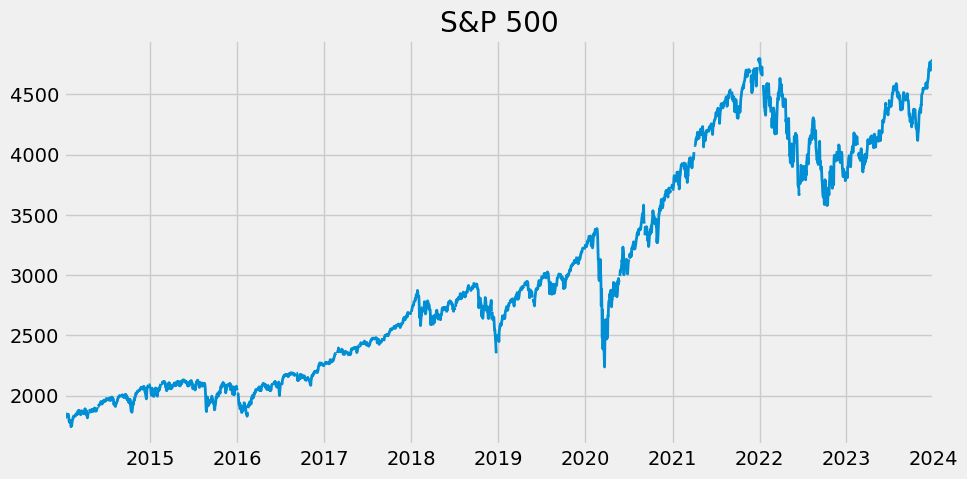

In [7]:
sp500.plot(figsize=(10, 5), title="S&P 500", lw=2)

# 4. Pull and Join Multiple Data Series

In [8]:
unemp_df = fred.search('unemployement rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [9]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis=1).drop(['M0892AUSM156SNBR'], axis=1)

In [12]:
uemp_states = uemp_results.drop('UNRATE', axis=1)
uemp_states = uemp_states.loc[:, ~(uemp_states.columns.str.startswith('LNS') | 
                                   uemp_states.columns.str.startswith('LAS') |
                                   uemp_states.columns.str.startswith('LRUN') |
                                   uemp_states.columns.str.startswith('U2RATE') |
                                   uemp_states.columns.str.startswith('M089'))]
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()
uemp_states.columns = [id_to_state[c].strip() for c in uemp_states.columns]
#uemp_states = uemp_states.drop('FRB-St. Louis District States (DISCONTINUED)', axis=1)
uemp_states = uemp_states.dropna()

In [13]:
uemp_states

,California,Texas,New York,Florida,Ohio,Pennsylvania,Alabama,Illinois,Michigan,New Jersey,Colorado,Minnesota,North Carolina,Georgia,Massachusetts,Arizona,Kentucky,Wisconsin,Tennessee,Virginia,Washington,Maryland,Oregon,West Virginia,Missouri,Indiana,Iowa,Oklahoma,Nevada,Arkansas,Louisiana,New Mexico,South Carolina,Alaska,Hawaii,Puerto Rico,Utah,Mississippi,Connecticut,North Dakota,Kansas,Idaho,Montana,Maine,Wyoming,Delaware,Nebraska,the District of Columbia,New Hampshire,Rhode Island,South Dakota,Vermont,Midwest Census Region,South Census Region,Northeast Census Region,West Census Region,New England Census Division,Mountain Census Division
1976-01-01,9.2,5.8,10.3,9.7,8.1,8.0,6.6,6.6,9.9,10.3,5.8,6.0,6.4,8.4,10.5,10.2,5.6,5.8,6.0,6.1,8.5,6.4,9.5,7.5,5.9,6.6,4.3,5.8,9.2,7.3,6.3,8.6,7.4,7.1,9.8,19.6,5.8,6.7,9.8,3.4,4.2,5.6,5.8,8.7,4.1,8.0,3.3,8.7,6.5,7.8,3.3,8.6,6.8,6.9,9.6,8.6,9.6,7.2
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,6.6,6.6,9.9,10.3,5.7,6.0,6.4,8.4,10.5,10.2,5.6,5.8,6.0,6.1,8.5,6.4,9.5,7.5,5.9,6.6,4.3,5.8,9.2,7.3,6.3,8.7,7.4,7.1,9.8,19.5,5.9,6.7,9.8,3.4,4.2,5.6,5.8,8.7,4.1,8.0,3.3,8.7,6.5,7.8,3.3,8.6,6.8,6.9,9.6,8.6,9.6,7.2
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,6.6,6.6,9.9,10.3,5.7,5.9,6.4,8.4,10.5,10.1,5.6,5.7,6.0,6.1,8.4,6.4,9.4,7.5,5.9,6.5,4.3,5.8,9.2,7.3,6.3,8.7,7.3,7.0,9.8,19.3,5.8,6.6,9.8,3.4,4.2,5.6,5.8,8.6,4.1,8.0,3.3,8.6,6.5,7.7,3.2,8.6,6.8,6.9,9.6,8.6,9.6,7.2
1976-04-01,9.1,5.9,10.2,9.5,8.0,8.1,6.5,6.6,9.8,10.3,5.6,5.8,6.3,8.3,10.3,10.0,5.6,5.6,6.0,6.0,8.5,6.4,9.2,7.5,6.0,6.3,4.2,5.8,9.0,7.2,6.4,8.6,7.2,6.9,9.7,19.0,5.8,6.4,9.6,3.5,4.2,5.6,5.8,8.6,4.0,8.1,3.2,8.5,6.5,7.7,3.1,8.6,6.7,6.8,9.5,8.5,9.4,7.1
1976-05-01,9.0,5.9,10.1,9.3,7.8,8.1,6.4,6.6,9.6,10.3,5.6,5.7,6.1,8.1,10.1,9.8,5.5,5.5,5.9,5.9,8.5,6.5,9.1,7.4,6.0,6.0,4.1,5.7,8.9,7.1,6.5,8.6,7.0,6.9,9.4,18.9,5.7,6.3,9.4,3.6,4.2,5.6,5.8,8.5,3.9,8.3,3.1,8.4,6.5,7.7,3.1,8.5,6.6,6.7,9.5,8.5,9.3,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,4.6,4.1,3.9,2.7,3.3,3.5,2.1,4.0,3.6,3.9,2.9,3.0,3.3,3.2,2.5,3.6,3.9,2.6,3.1,2.5,3.6,1.8,3.4,3.4,2.7,3.3,2.7,2.7,5.3,2.6,3.4,3.6,3.1,3.8,2.8,6.2,2.4,3.0,3.6,2.0,2.7,2.8,2.5,2.4,3.0,4.1,2.0,5.0,1.7,2.8,1.9,1.8,3.2,3.2,3.5,4.0,2.7,3.4
2023-08-01,4.6,4.1,3.9,2.7,3.4,3.5,2.1,4.1,3.7,4.2,3.1,3.1,3.3,3.3,2.6,3.8,4.0,2.9,3.1,2.5,3.6,1.7,3.4,3.6,2.8,3.4,2.9,2.8,5.4,2.7,3.3,3.7,3.0,3.9,2.8,6.2,2.5,3.2,3.5,1.9,2.7,3.0,2.5,2.5,2.9,4.1,2.0,5.0,1.8,2.7,1.9,1.8,3.3,3.2,3.5,4.0,2.7,3.5
2023-09-01,4.7,4.1,4.0,2.8,3.4,3.4,2.2,4.4,3.9,4.4,3.2,3.1,3.4,3.4,2.6,4.0,4.1,3.1,3.2,2.5,3.6,1.6,3.5,3.8,2.9,3.6,3.0,3.0,5.4,2.9,3.3,3.7,2.9,4.1,2.8,6.0,2.6,3.2,3.5,1.9,2.8,3.1,2.7,2.7,2.9,4.1,2.1,5.0,2.0,2.6,1.9,1.9,3.4,3.2,3.6,4.1,2.7,3.6
2023-10-01,4.8,4.1,4.2,2.8,3.6,3.4,2.3,4.6,4.1,4.6,3.3,3.2,3.4,3.4,2.8,4.2,4.2,3.2,3.3,2.7,3.8,1.7,3.6,4.0,3.1,3.6,3.2,3.2,5.4,3.1,3.3,3.8,2.9,4.3,2.9,5.8,2.7,3.3,3.5,1.9,2.9,3.2,2.8,2.8,2.9,4.2,2.2,5.0,2.1,2.7,2.0,2.0,3.6,3.3,3.7,4.2,2.8,3.7


In [14]:
# Plot Staten Unemployement Rate
px.line(uemp_states)

## Pull April 2020 Unemployment Rate Per State

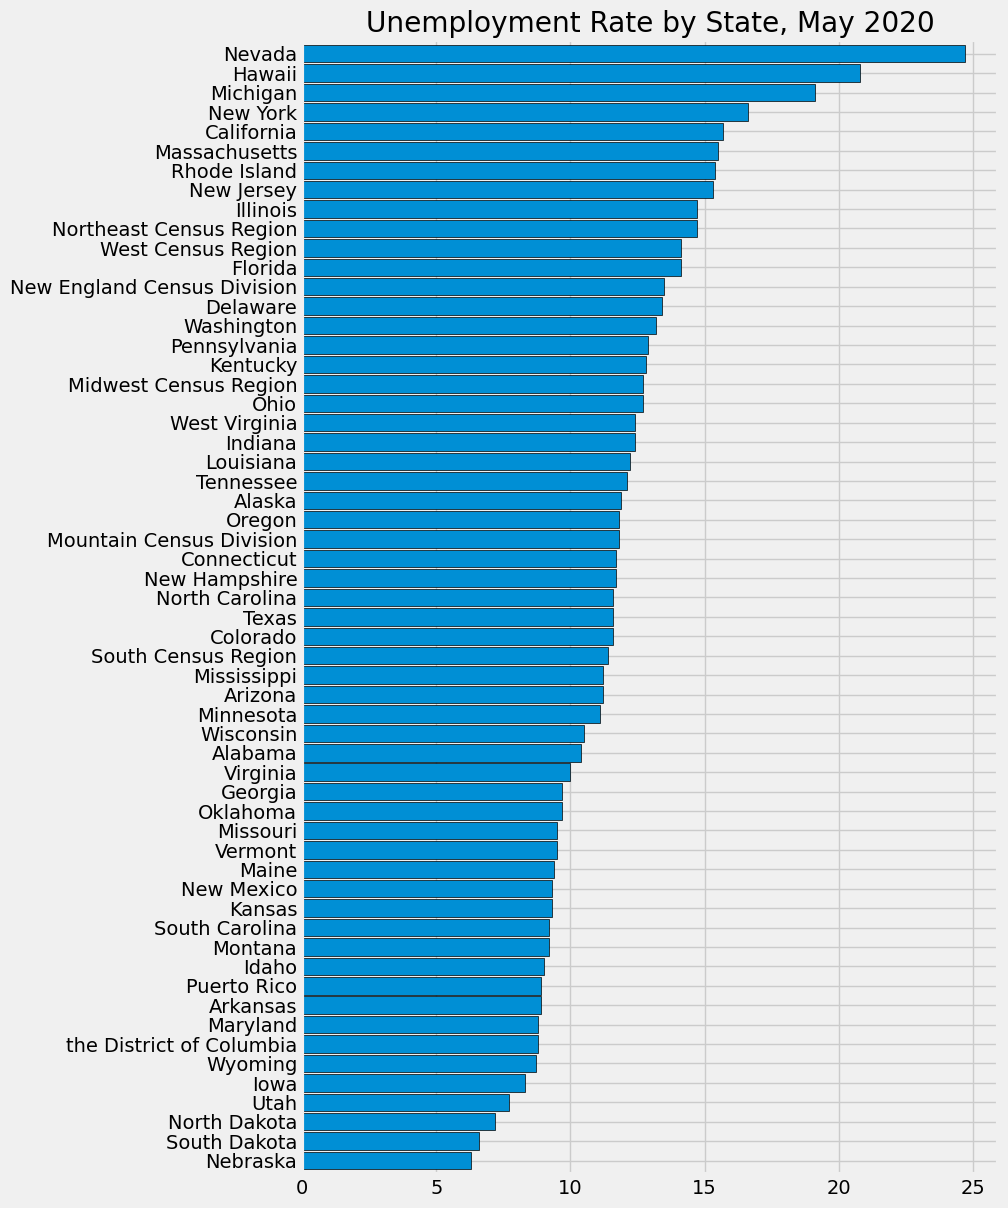

In [15]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 14),
        width=0.9, edgecolor = 'black',
        title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

## 4. Pull Participation Rate

In [16]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df['observation_start'] = pd.to_datetime(part_df['observation_start'])
part_df = part_df[part_df['observation_start'] >= '1976-01-01']
part_df = part_df[~(part_df[('id')].str.startswith('LNS') |
                   part_df[('id')].str.startswith('LRI') |
                   part_df[('id')].str.startswith('LRA') |
                   part_df[('id')].str.startswith('M089'))]


In [26]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)

part_states.columns = [part_id_to_state[c].strip() for c in part_states.columns]



## Plot Unemployment vs Participation

IndexError: index 50 is out of bounds for axis 0 with size 50

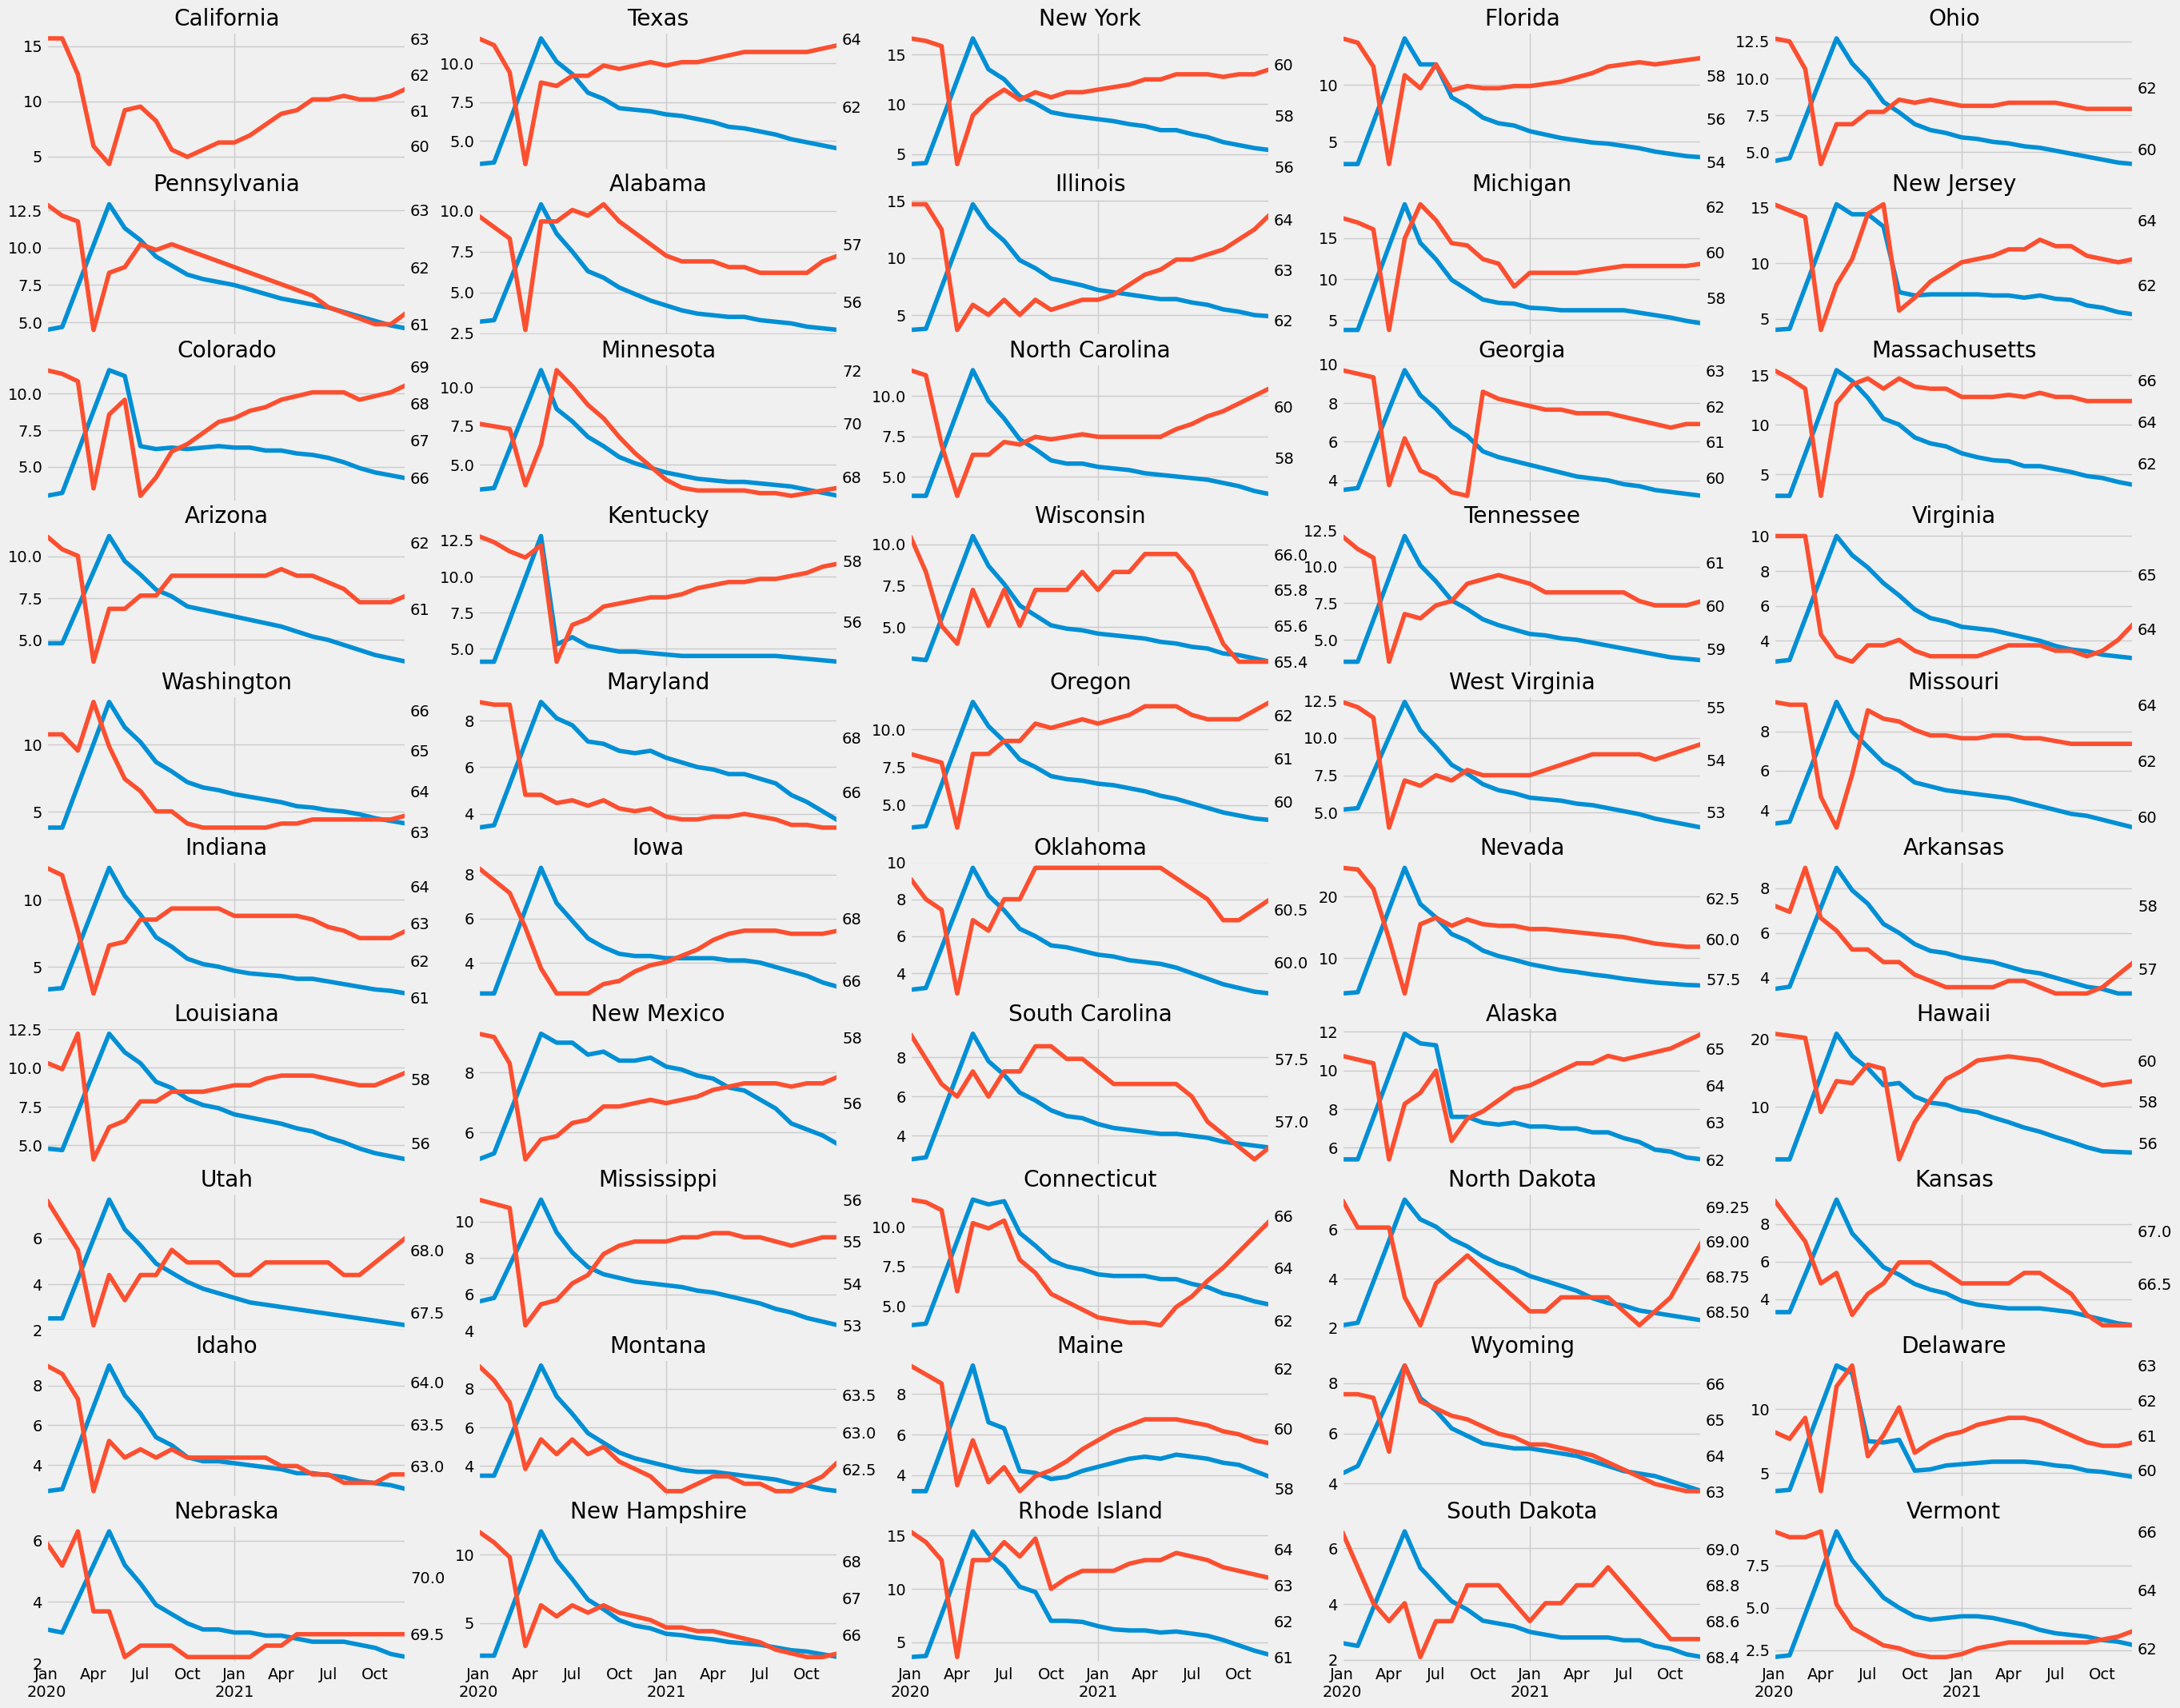

In [27]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state == 'Puerto Rico' or state == "the District of Columbia":
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >=2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >=2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1

plt.tight_layout()
plt.show()
